<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [65]:
hh_database = pd.read_csv('Data/dst-3.0_16_1_hh_database.csv',sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [66]:
hh_database.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [67]:
# Получаем информацию о типах данных и количестве непустых значений
info = hh_database.info()

# Считаем количество непустых значений в каждом столбце
non_null_counts = hh_database.notnull().sum()

# Получаем типы данных столбцов
data_types = hh_database.dtypes

# Создаем DataFrame для отображения результатов
summary = pd.DataFrame({
    'Non-null Count': non_null_counts,
    'Data Type': data_types
})

# Выводим результаты
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [68]:
# Получаем основную статистическую информацию для числовых столбцов
numeric_description = hh_database.describe()

# Получаем основную статистическую информацию для категориальных (объектных) столбцов
categorical_description = hh_database.describe(include='object')

# Выводим результаты
print("Основная статистическая информация для числовых столбцов:")
print(numeric_description)

print("\Основная статистическая информация для категориальных столбцов:")
print(categorical_description)

Основная статистическая информация для числовых столбцов:
                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [69]:
# Определение функции для преобразования уровня образования
def map_education_level(education_str):
    education_str = education_str.lower().strip()
    words = education_str.split()

    if len(words) > 0:
        if words[0] == 'высшее':
            return 'высшее'
        elif words[0] == 'неоконченное':
            return 'неоконченное высшее'
    
    if len(words) > 1:
        if words[1] == 'специальное':
            return 'среднее специальное'
        elif words[1] == 'образование':
            return 'среднее'

    return 'неизвестно'  # Для случаев, когда условия не выполняются

# Применение функции к столбцу "Образование и ВУЗ"
hh_database['Образование'] = hh_database['Образование и ВУЗ'].apply(map_education_level)

# Подсчет количества соискателей в каждой образовательной категории
education_counts = hh_database['Образование'].value_counts()

# Вывод результатов
print("Количество соискателей в каждой образовательной категории:")

print(education_counts)

# Формирование нового DataFrame без столбца 'Образование и ВУЗ'
hh_database = hh_database.drop(columns=['Образование и ВУЗ'])
hh_database.head()

Количество соискателей в каждой образовательной категории:
Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [70]:
# Функция для извлечения пола и возраста
def extract_gender_age(row):
    parts = row.split(' , ')
    gender = parts[0]
    age_string = parts[1]
    
    # Определение пола
    if gender == "Мужчина":
        gender_value = 'М'
    elif gender == "Женщина":
        gender_value = 'Ж'
    else:
        gender_value = None  # на случай неожиданных значений
    
    # Извлечение возраста
    age = int(age_string.split()[0])  # Берем только цифры из строки
    
    return pd.Series([gender_value, age])

# Применяем функцию к столбцу и создаем новые столбцы
hh_database[['Пол', 'Возраст']] = hh_database['Пол, возраст'].apply(extract_gender_age)

# Удаляем старый столбец
hh_database.drop(columns=['Пол, возраст'], inplace=True)

# Общее количество резюме
total_resumes = len(hh_database)

# Количество женских резюме
female_resumes = hh_database[hh_database['Пол'] == 'Ж'].shape[0]

# Расчет процента
percentage_female_resumes = (female_resumes / total_resumes) * 100

# Округление до сотых
rounded_percentage = round(percentage_female_resumes, 2)

# Вывод результата
print(f"Процент женских резюме: {rounded_percentage}%")

# Расчет среднего возраста
average_age = hh_database['Возраст'].mean()

# Округление результата
rounded_average_age = round(average_age, 2)

# Вывод результата
print(f"Средний возраст соискателей: {rounded_average_age}")

Процент женских резюме: 19.07%
Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [71]:
# Функция для преобразования опыта работы в месяцы
def convert_experience_to_months(experience):
    if pd.isna(experience) or experience.lower() == "не указано":
        return np.nan
    
    # Инициализация переменных
    years = 0
    months = 0
    found_years = False
    found_months = False
    
    # Приводим строку к нижнему регистру и разделяем по пробелам
    parts = experience.lower().split()

    for i, part in enumerate(parts):
        # Прекращаем перебор, если обработали 8 слов
        if i >= 8:
            break

        # Обработка годов
        if not found_years and ("лет" in part or "год" in part or "года" in part):
            if i > 0 and parts[i - 1].isdigit():
                years = int(parts[i - 1])
                found_years = True  # Устанавливаем флаг, что год уже найден

        # Обработка месяцев
        if not found_months and ("месяц" in part or "месяцев" in part or "месяца" in part):
            if i > 0 and parts[i - 1].isdigit():
                months = int(parts[i - 1])
                found_months = True  # Устанавливаем флаг, что месяц уже найден

        # Прерывание цикла, если оба значения найдены
        if found_years and found_months:
            break

    # Возвращаем общее количество месяцев
    total_months = years * 12 + months
    return total_months

# Применяем функцию к столбцу "Опыт работы"
hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы'].apply(convert_experience_to_months)

# Считаем медианное значение
median_experience = hh_database['Опыт работы (месяц)'].median()
print("Медианный опыт работы в месяцах:", median_experience)



Медианный опыт работы в месяцах: 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [72]:
# Список городов-миллионников
cities_million_plus = [
    "Новосибирск", "Екатеринбург", "Нижний Новгород", "Казань", "Челябинск", 
    "Омск", "Самара", "Ростов-на-Дону", "Уфа", "Красноярск", "Пермь", 
    "Воронеж", "Волгоград"
]

# Функция для классификации города
def extract_city_category(row):
    parts = row.split(',')  # Разделение данных по запятым
    city = parts[0].strip()  # Извлечение названия города (первый элемент списка)

    # Классификация города
    if city == "Москва":
        return "Москва"
    elif city == "Санкт-Петербург":
        return "Санкт-Петербург"
    elif city in cities_million_plus:
        return "город-миллионник"
    else:
        return "другие"

# Оптимизация функций для проверки готовности
# Готовность/неготовность к переезду
relocation_phrases_positive = [
    "хочу переехать", "готов к переезду", "готова к переезду"
]
relocation_phrases_negative = [
    "не хочу переехать", "не готов к переезду", "не готова к переезду"
]

# Готовность/неготовность к командировкам
travel_phrases_positive = [
    "готов к командировкам", "готова к командировкам", 
    "готов к редким командировкам", "готова к редким командировкам"
]
travel_phrases_negative = [
    "не готов к командировкам", "не готова к командировкам"
]

# Функции для определения состояния по переезду и командировкам
def ready_to_relocate(row):
    # Если есть слова, указывающие на неготовность, возвращаем False
    if any(phrase in row for phrase in relocation_phrases_negative):
        return False
    # Если есть готовностные фразы, возвращаем True
    return any(phrase in row for phrase in relocation_phrases_positive)

def ready_to_travel(row):
    # Если есть слова, указывающие на неготовность, возвращаем False
    if any(phrase in row for phrase in travel_phrases_negative):
        return False
    # Если есть готовностные фразы, возвращаем True
    return any(phrase in row for phrase in travel_phrases_positive)

def ready_to_relocate_and_travel(row):
    # Проверяем готовность и к переезду, и к командировкам
    relocate_ready = ready_to_relocate(row)
    travel_ready = ready_to_travel(row)
    return relocate_ready and travel_ready

# Преобразование данных с использованием новых функций
hh_database["Город"] = hh_database["Город, переезд, командировки"].apply(extract_city_category)
hh_database["Готовность к переезду"] = hh_database["Город, переезд, командировки"].apply(ready_to_relocate)
hh_database["Готовность к командировкам"] = hh_database["Город, переезд, командировки"].apply(ready_to_travel)
hh_database["Готов и к переезду и к командировкам"] = hh_database["Город, переезд, командировки"].apply(ready_to_relocate_and_travel)

# Подсчёт количества соискателей в Санкт-Петербурге
spb_candidates = hh_database["Город"].value_counts().get("Санкт-Петербург", 0)
total_candidates = hh_database.shape[0]
spb_percentage = round((spb_candidates / total_candidates) * 100) if total_candidates > 0 else 0

# Подсчёт процента соискателей, готовых и к переезду, и к командировкам
total_rows = len(hh_database)
ready_count = hh_database["Готов и к переезду и к командировкам"].sum()
ready_percentage = (ready_count / total_rows) * 100 if total_rows > 0 else 0

# Вывод результатов
print(hh_database)
print(f"Процент соискателей, проживающих в Санкт-Петербурге: {spb_percentage}%")
print(f"Процент соискателей, готовых и к переезду, и к командировкам: {ready_percentage:.2f}%")


                ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                            Город, переезд, командировки  \
0      Советск (Калининградская область) , не готов к...   
1  

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [73]:
# Категории занятости и графика
employment_categories = [
    "полная занятость",
    "частичная занятость",
    "проектная работа",
    "волонтерство",
    "стажировка"
]

schedule_categories = [
    "полный день",
    "сменный график",
    "гибкий график",
    "удаленная работа",
    "вахтовый метод"
]

# Функция, которая добавляет столбцы для категорий
def add_category_columns(hh_database, column, categories):
    for category in categories:
        hh_database[category] = hh_database[column].apply(lambda x: category in x if pd.notnull(x) else False)

# Разделяем категории занятости
add_category_columns(hh_database, "Занятость", employment_categories)

# Разделяем категории графика
add_category_columns(hh_database, "График", schedule_categories)

# Находим тех, кто ищет одновременно проектную работу и волонтерство
filtered_df_project = hh_database[(hh_database["проектная работа"] == True) & (hh_database["волонтерство"] == True)]

# Выводим количество таких строк
count = len(filtered_df_project)
print(f"Количество людей, которые ищут проектную работу и волонтерство: {count}")

# Находим тех, кто хочет работать вахтовым методом и с гибким графиком
filtered_df_watch = hh_database[(hh_database["вахтовый метод"] == True) & (hh_database["гибкий график"] == True)]

# Выводим количество таких строк
count = len(filtered_df_watch)
print(f"Количество людей, которые хотят работать вахтовым методом и с гибким графиком: {count}")

Количество людей, которые ищут проектную работу и волонтерство: 436
Количество людей, которые хотят работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [74]:
hh_Exchange = pd.read_csv('Data/ExchangeRates.csv', sep=',')  # Загрузка данных курсов валют

# 2. Преобразование дат в hh_database
hh_database['Обновление резюме'] = pd.to_datetime(
    hh_database['Обновление резюме'], format='%d.%m.%Y %H:%M', errors='coerce'
).dt.date

# 3. Преобразование дат в hh_Exchange
hh_Exchange['date'] = pd.to_datetime(
    hh_Exchange['date'], dayfirst=True, errors='coerce'
).dt.date

# 4. Проверка наличия некорректных данных
if hh_database['Обновление резюме'].isnull().any():
    print("Некоторые даты в 'Обновление резюме' не были преобразованы. Проверьте формат.")
if hh_Exchange['date'].isnull().any():
    print("Некоторые даты в 'date' не были преобразованы. Проверьте формат.")

# 5. Выделение зарплаты и валюты
hh_database[['ЗП_сумма', 'ЗП_валюта']] = hh_database['ЗП'].str.extract(r'(\d[\d\s]*)\s*([\w.\-]+)')
hh_database['ЗП_сумма'] = hh_database['ЗП_сумма'].str.replace(' ', '').astype(float)

currency_mapping = {
    'грн.': 'UAH', 'USD': 'USD', 'EUR': 'EUR', 'бел.руб.': 'BYN',
    'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN', 'KZT': 'KZT', 'руб.': 'RUB'
}
hh_database['ЗП_валюта'] = hh_database['ЗП_валюта'].map(currency_mapping)

# 6. Присоединение курсов валют
hh_Exchange.loc[hh_Exchange['currency'] == 'RUB', 'close'] = 1  # Устанавливаем фиксированный курс для RUB = 1
hh_merged = pd.merge(
    hh_database,
    hh_Exchange,
    how='left',
    left_on=['Обновление резюме', 'ЗП_валюта'],
    right_on=['date', 'currency']
)

# 7. Пересчет зарплаты в рублях
hh_merged['close'].fillna(1, inplace=True)        # Заполняем пропуски в курсе валют значением 1
hh_merged['proportion'].fillna(1, inplace=True)  # Если для валюты нет коэффициента, считаем его = 1
hh_merged['ЗП (руб)'] = (hh_merged['ЗП_сумма'] * hh_merged['close']) / hh_merged['proportion']

# 8. Тестовое задание 
median_salary = hh_merged['ЗП (руб)'].median()
print(f"Медианная зарплата: {median_salary} руб.")


C:\Users\vani003\AppData\Local\Temp\ipykernel_14004\3069493875.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hh_Exchange['date'] = pd.to_datetime(


Медианная зарплата: 59019.0 руб.


C:\Users\vani003\AppData\Local\Temp\ipykernel_14004\3069493875.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hh_merged['close'].fillna(1, inplace=True)        # Заполняем пропуски в курсе валют значением 1
C:\Users\vani003\AppData\Local\Temp\ipykernel_14004\3069493875.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [75]:
# Удаление ненужных данных
columns_to_remove = ['ЗП', 'Занятость', 'График', 'Готов и к переезду и к командировкам',
                     'ЗП_сумма', 'ЗП_валюта', 'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion']

# Удаляем указанные столбцы с помощью метода drop
hh_cleaned = hh_merged.drop(columns=columns_to_remove)

# Проверяем результат
print(hh_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Город, переезд, командировки     44744 non-null  object 
 2   Опыт работы                      44576 non-null  object 
 3   Последнее/нынешнее место работы  44743 non-null  object 
 4   Последняя/нынешняя должность     44742 non-null  object 
 5   Обновление резюме                44744 non-null  object 
 6   Авто                             44744 non-null  object 
 7   Образование                      44744 non-null  object 
 8   Пол                              44744 non-null  object 
 9   Возраст                          44744 non-null  int64  
 10  Опыт работы (месяц)              44574 non-null  float64
 11  Город                            44744 non-null  object 
 12  Готовность к перее

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

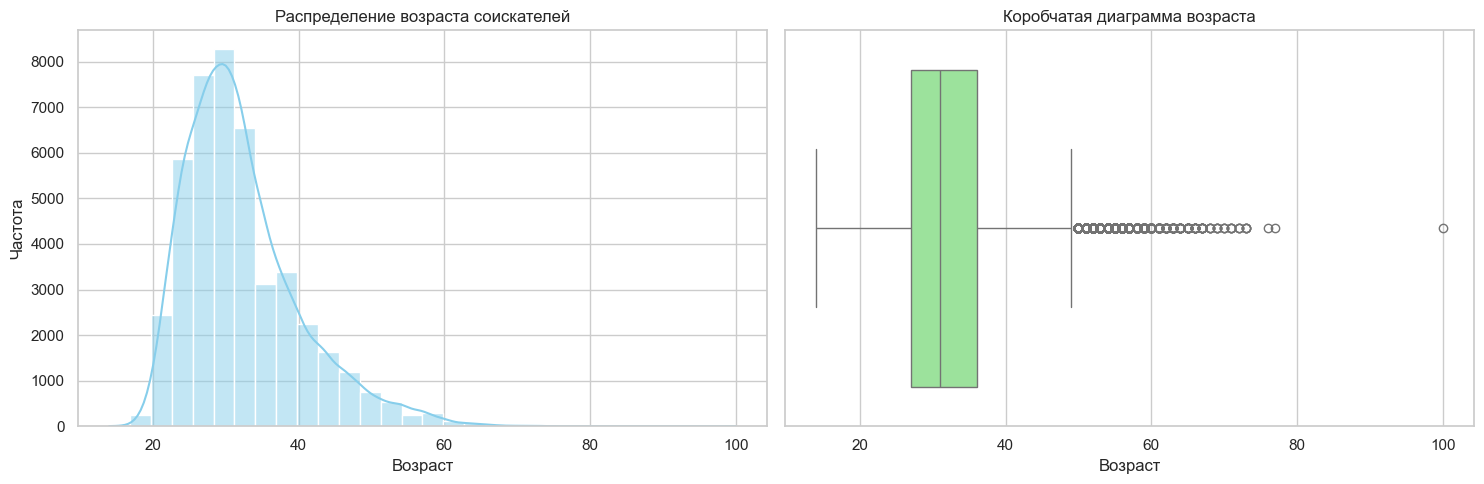

Мода распределения: 30
Минимальное значение возраста: 14
Максимальное значение возраста: 100


In [76]:
plt.figure(figsize=(15, 5))

# График 1: Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(hh_cleaned['Возраст'], bins=30, kde=True, color='skyblue')
plt.title('Распределение возраста соискателей')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# График 2: Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=hh_cleaned['Возраст'], color='lightgreen')
plt.title('Коробчатая диаграмма возраста')
plt.xlabel('Возраст')

plt.tight_layout()
plt.show()

# Расчеты для вопроса:
mode_age = hh_cleaned['Возраст'].mode()[0]
min_age = hh_cleaned['Возраст'].min()
max_age = hh_cleaned['Возраст'].max()

print(f"Мода распределения: {mode_age}")
print(f"Минимальное значение возраста: {min_age}")
print(f"Максимальное значение возраста: {max_age}")

Ответы на вопросы:
Мода в данной выборке составляет 30 лет. Возрастной диапазон варьирует от минимального значения в 14 лет до максимального – 100 лет. Основная часть кандидатов находится в возрасте от 20 до 40 лет, что наглядно отображается на гистограмме частот. Анализируя данные и используя логические рассуждения, а также опираясь на результаты анализа коробчатой диаграммы, можно выделить аномальные значения. К ним относятся слишком юные кандидаты (возраст менее 16 лет), где минимальным значением является 14 лет, что вызывает сомнения относительно достоверности таких данных. Вероятно, эти значения являются результатом ошибки ввода или тестирования системы. Также к аномалиям относится пожилой возраст (старше 80-90 лет), так как в реальной практике размещение резюме лицами такого возраста встречается крайне редко.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

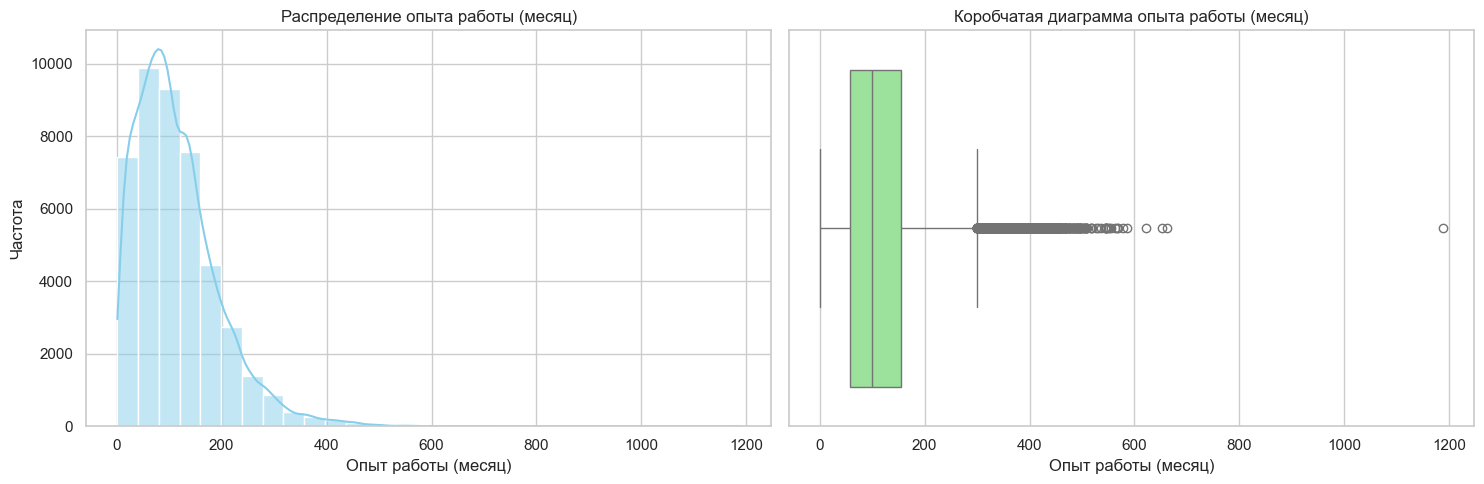

Мода распределения: 81.0 месяцев
Минимальное значение опыта работы: 1.0 месяцев
Максимальное значение опыта работы: 1188.0 месяцев
Интервал, в котором находится опыт работы большинства соискателей: 57.0–154.0 месяцев
Нижняя граница для выбросов: -88.5 месяцев, верхняя граница для выбросов: 299.5 месяцев
Число выбросов: 1276


In [77]:
# Построим гистограмму и коробчатую диаграмму для признака "Опыт работы (месяц)"
plt.figure(figsize=(15, 5))

# График 1: Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(hh_cleaned['Опыт работы (месяц)'], bins=30, kde=True, color='skyblue')
plt.title('Распределение опыта работы (месяц)')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Частота')

# График 2: Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=hh_cleaned['Опыт работы (месяц)'], color='lightgreen')
plt.title('Коробчатая диаграмма опыта работы (месяц)')
plt.xlabel('Опыт работы (месяц)')

plt.tight_layout()
plt.show()

# Расчеты
mode_experience = hh_cleaned['Опыт работы (месяц)'].mode()[0]  # Мода
min_experience = hh_cleaned['Опыт работы (месяц)'].min()      # Минимум
max_experience = hh_cleaned['Опыт работы (месяц)'].max()      # Максимум

# Квартильные параметры для оценки выбросов
Q1 = hh_cleaned['Опыт работы (месяц)'].quantile(0.25)
Q3 = hh_cleaned['Опыт работы (месяц)'].quantile(0.75)
IQR = Q3 - Q1  # Интерквартильный размах
lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница

# Найдем аномалии
outliers = hh_cleaned[(hh_cleaned['Опыт работы (месяц)'] < lower_bound) | 
                      (hh_cleaned['Опыт работы (месяц)'] > upper_bound)]

print(f"Мода распределения: {mode_experience} месяцев")
print(f"Минимальное значение опыта работы: {min_experience} месяцев")
print(f"Максимальное значение опыта работы: {max_experience} месяцев")
print(f"Интервал, в котором находится опыт работы большинства соискателей: {Q1}–{Q3} месяцев")
print(f"Нижняя граница для выбросов: {lower_bound} месяцев, верхняя граница для выбросов: {upper_bound} месяцев")
print(f"Число выбросов: {len(outliers)}")

Распределение опыта работы кандидатов показывает, что большинство соискателей имеют стаж в диапазоне от 57 до 154 месяцев (примерно 4,75–12,8 лет), а мода равна 81 месяцу. Минимальное значение стажа составляет 1 месяц, максимальное — 1188 месяцев, но такие значения выглядят как аномалии. К выбросам можно отнести значения, превышающие диапазон от 0 до 299,5 месяцев, что предполагает наличие данных с сильными отклонениями (включая стаж, превышающий 25 лет, или явно некорректные данные). Общая тенденция демонстрирует сосредоточенность опыта в разумных рамках с редкими экстремальными случаями.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


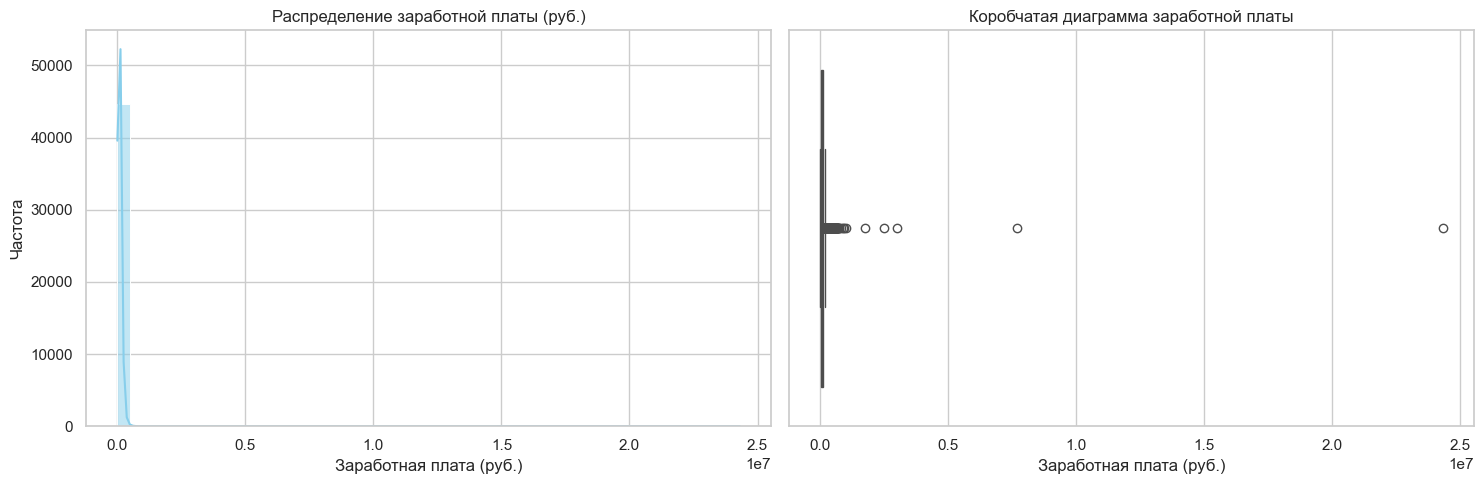

Мода распределения заработной платы: 50000.0 руб.
Минимальное значение заработной платы: 1.0 руб.
Максимальное значение заработной платы: 24304876.0 руб.
Межквартильный размах (IQR): 57917.8 руб.
Нижняя граница для выбросов: -49794.500000000015 руб.
Верхняя граница для выбросов: 181876.7 руб.
Количество соискателей с зарплатой > 1 млн руб.: 5


In [78]:

# Построим гистограмму и коробчатую диаграмму для анализа распределения
plt.figure(figsize=(15, 5))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(hh_cleaned['ЗП (руб)'], bins=50, kde=True, color='skyblue')
plt.title('Распределение заработной платы (руб.)')
plt.xlabel('Заработная плата (руб.)')
plt.ylabel('Частота')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=hh_cleaned['ЗП (руб)'], color='orange')
plt.title('Коробчатая диаграмма заработной платы')
plt.xlabel('Заработная плата (руб.)')

plt.tight_layout()
plt.show()

# Расчеты
mode_salary = hh_cleaned['ЗП (руб)'].mode()[0]  # Мода
min_salary = hh_cleaned['ЗП (руб)'].min()       # Минимальная ЗП
max_salary = hh_cleaned['ЗП (руб)'].max()       # Максимальная ЗП

# Основной диапазон заработных плат (межквартильный размах) для выбросов
Q1 = hh_cleaned['ЗП (руб)'].quantile(0.25)      # Первый квартили
Q3 = hh_cleaned['ЗП (руб)'].quantile(0.75)      # Третий квартили
IQR = Q3 - Q1                                   # Размах
lower_bound = Q1 - 1.5 * IQR                    # Нижняя граница (выбросы)
upper_bound = Q3 + 1.5 * IQR                    # Верхняя граница (выбросы)

# Фильтрация аномальных значений
outliers = hh_cleaned[(hh_cleaned['ЗП (руб)'] < lower_bound) | (hh_cleaned['ЗП (руб)'] > upper_bound)]

# Количество соискателей с ЗП > 1 млн
above_million = hh_cleaned[hh_cleaned['ЗП (руб)'] > 1_000_000].shape[0]

# Вывод результатов
print(f"Мода распределения заработной платы: {mode_salary} руб.")
print(f"Минимальное значение заработной платы: {min_salary} руб.")
print(f"Максимальное значение заработной платы: {max_salary} руб.")
print(f"Межквартильный размах (IQR): {IQR} руб.")
print(f"Нижняя граница для выбросов: {lower_bound} руб.")
print(f"Верхняя граница для выбросов: {upper_bound} руб.")
print(f"Количество соискателей с зарплатой > 1 млн руб.: {above_million}")

Анализ заработной платы кандидатов показывает, что мода распределения составляет 50 000 руб., то есть это наиболее часто встречающееся значение зарплатных ожиданий. Минимальная зарплата равна 1 руб., максимальная — 24 304 876 руб., что свидетельствует о наличии экстремальных значений. Межквартильный размах (IQR) составляет 57 917,8 руб., позволяя определить интервал "обычных" зарплат большинства кандидатов: от примерно 1 руб. до 181 876,7 руб. Значения выше этой границы можно считать аномальными, особенно зарплаты свыше 1 млн руб., которых насчитывается 5 случаев. Нижняя граница выбросов является отрицательной (-49 794,5 руб.), что также указывает на возможные ошибки ввода данных. Таким образом, данные включают очевидные аномалии — такие как минимальные и максимальные значения зарплат, в том числе 5 кандидатов с ожиданиями заработной платы выше 1 млн руб., что явно нехарактерно для основной выборки.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

C:\Users\vani003\AppData\Local\Temp\ipykernel_14004\2701433908.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


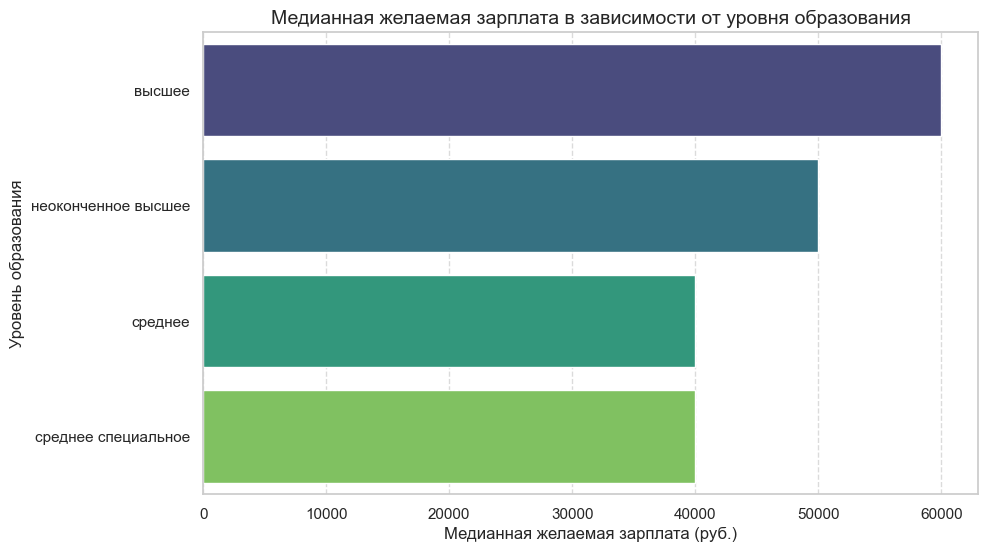

           Образование  ЗП (руб)
0               высшее   60000.0
1  неоконченное высшее   50000.0
2              среднее   40000.0
3  среднее специальное   40000.0


In [79]:
# 1. Фильтруем данные - только резюме с желаемой ЗП < 1 млн рублей
filtered_data = hh_cleaned[hh_cleaned['ЗП (руб)'] < 1_000_000]

# 2. Группируем данные по уровню образования и рассчитываем медианную ЗП
median_salaries_by_education = (
    filtered_data.groupby('Образование')['ЗП (руб)']
    .median()
    .sort_values(ascending=False)
).reset_index()

# 3. Построим столбчатую диаграмму для наглядности
plt.figure(figsize=(10, 6))
sns.barplot(
    data=median_salaries_by_education,
    x='ЗП (руб)', 
    y='Образование', 
    palette='viridis'
)

# Добавляем подписи и заголовок
plt.title('Медианная желаемая зарплата в зависимости от уровня образования', fontsize=14)
plt.xlabel('Медианная желаемая зарплата (руб.)')
plt.ylabel('Уровень образования')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Результат медианной зарплаты
print(median_salaries_by_education)

С одной стороны, уровень образования по-прежнему является важным и значимым фактором. Согласно данным диаграммы, около трети желаемого дохода зависит именно от образовательного уровня. В то же время высокая доля людей с высшим образованием, которые демонстрируют самые амбициозные зарплатные ожидания, объясняется их, как правило, более высокой самооценкой, а не наличием практического опыта и навыков. Распространенность высшего образования делает именно эту категорию соискателей центральной для анализа. Тем не менее, несмотря на ключевую роль высшего образования в ряде профессий (например, научная деятельность или преподавание), необходимо учитывать и другие значимые факторы. К ним относятся профессиональный опыт, выбранная отрасль, географическое расположение и знание иностранных языков. Более того, даже кандидат без высшего образования, обладающий востребованными навыками, особенно в таких сферах, как IT, может успешно рассчитывать на высокий уровень заработной платываши выводы здесь. Еще одно интересное наблюдение заключается в том, что медианные зарплаты в двух самых низких категориях уровня образования — «среднее» и «среднее специальное» — оказываются почти одинаковыми, что может свидетельствовать либо о фактически невысоком качестве среднего специального образования, либо о его таком восприятии со стороны рынка труда.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

C:\Users\vani003\AppData\Local\Temp\ipykernel_14004\3910253662.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


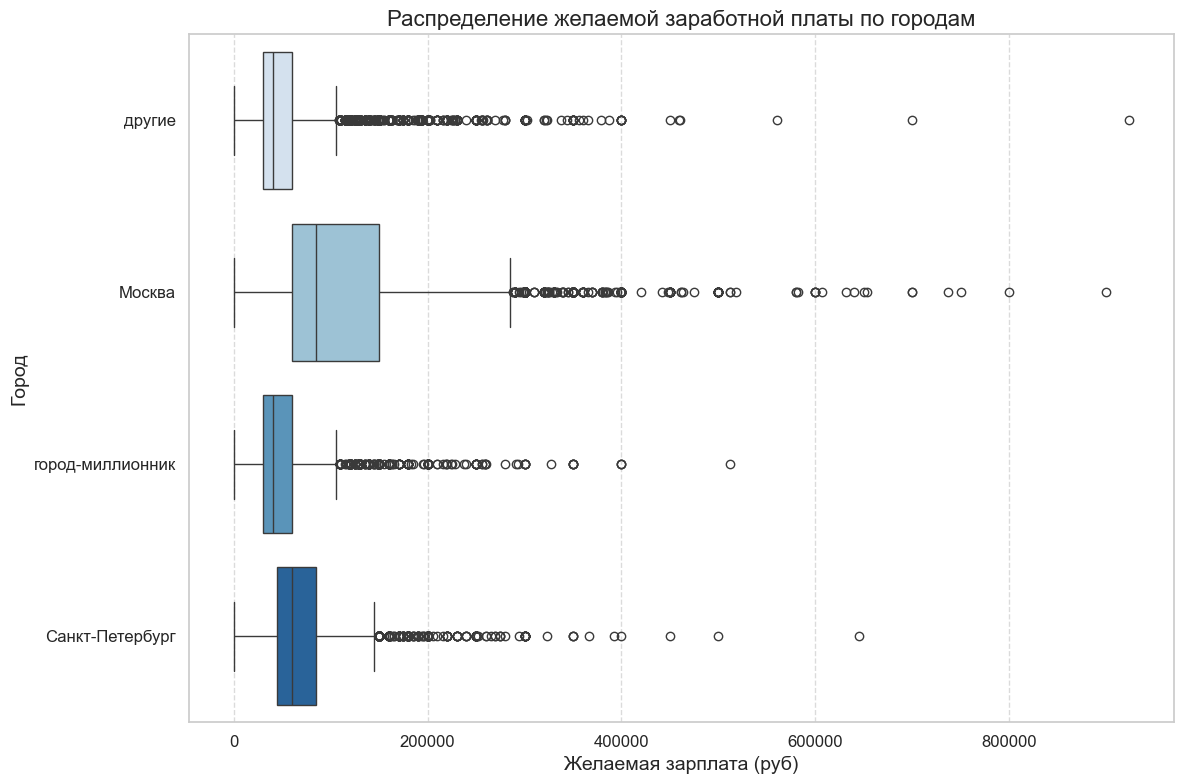

In [80]:
# 1. Фильтруем данные (только ЗП < 1 млн рублей)
filtered_data = hh_cleaned[hh_cleaned['ЗП (руб)'] < 1_000_000]

# 2. Строим boxplot для отображения распределения ЗП по городам
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=filtered_data,
    x='ЗП (руб)', 
    y='Город', 
    palette='Blues'
)

# 3. Настройка визуализации
plt.title('Распределение желаемой заработной платы по городам', fontsize=16)
plt.xlabel('Желаемая зарплата (руб)', fontsize=14)
plt.ylabel('Город', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Вывод диаграммы
plt.show()

Москва и Санкт-Петербург характеризуются более высокими медианными уровнями заработной платы по сравнению с прочими городами-миллиониками и другими региональными городами. Кроме того, для этих мегаполисов характерен широкий межквартильный диапазон, что свидетельствует о значительной дифференциации доходов. Это косвенно указывает на наличие как высокооплачиваемых позиций, так и рабочих мест с более низкой заработной платой. В то же время в городах-миллионниках и других населённых пунктах нередко наблюдаются не только сниженные медианные значения заработной платы, но и узкий межквартильный диапазон, что отражает меньшее разнообразие вакансий. Хотя город-миллионик не дает значимых преимуществ соискателю, фактор города очевидно является ключевым при прогнозировании уровня оплаты труда, поскольку он отражает степень экономического развития региона, уровень жизни, доступность высокооплачиваемых рабочих мест и спрос на определённые профессии. Учитывая значимость данного параметра, включение признака города в модель прогнозирования заработной платы является крайне важным.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

   Готовность к переезду  Готовность к командировкам   ЗП (руб)
0                  False                       False  40000.000
1                  False                        True  60000.000
2                   True                       False  50000.000
3                   True                        True  65849.455


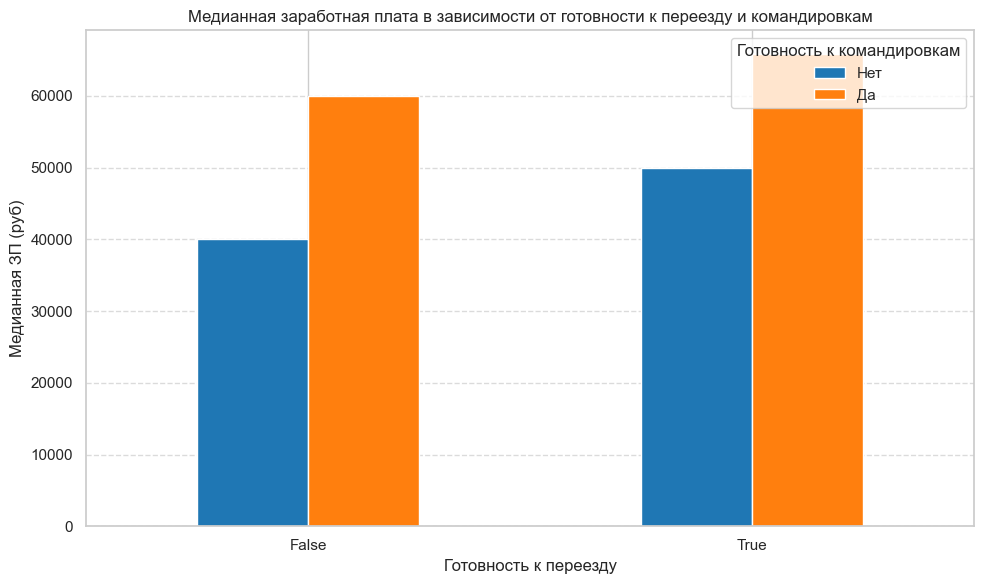

In [81]:
# Группировка данных и расчет медианы для каждой комбинации
grouped = hh_cleaned.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()
print (grouped)
# Создание таблицы
pivot = grouped.pivot(index='Готовность к переезду', columns='Готовность к командировкам', values='ЗП (руб)')

# Строим диаграмму
pivot.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Медианная заработная плата в зависимости от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=0)  # Делаем подписи оси X горизонтальными
plt.legend(title='Готовность к командировкам', labels=['Нет', 'Да'])  # Указываем легенду
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем горизонтальную сетку
plt.tight_layout()  # Убираем лишние отступы
plt.show()


Кандидаты, рассматривающие возможность переезда и участия в командировках, обычно ориентированы на более высокий уровень заработной платы. Данное обстоятельство является общепринятым и поддерживается большинством работодателей, поскольку такие сотрудники проявляют гибкость и готовность к выполнению дополнительных трудовых обязанностей, связанных с регулярными перемещениями и адаптацией к изменяющимся рабочим условиям. В целом это значимый фактор, требующий внимательного и всестороннего анализа.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

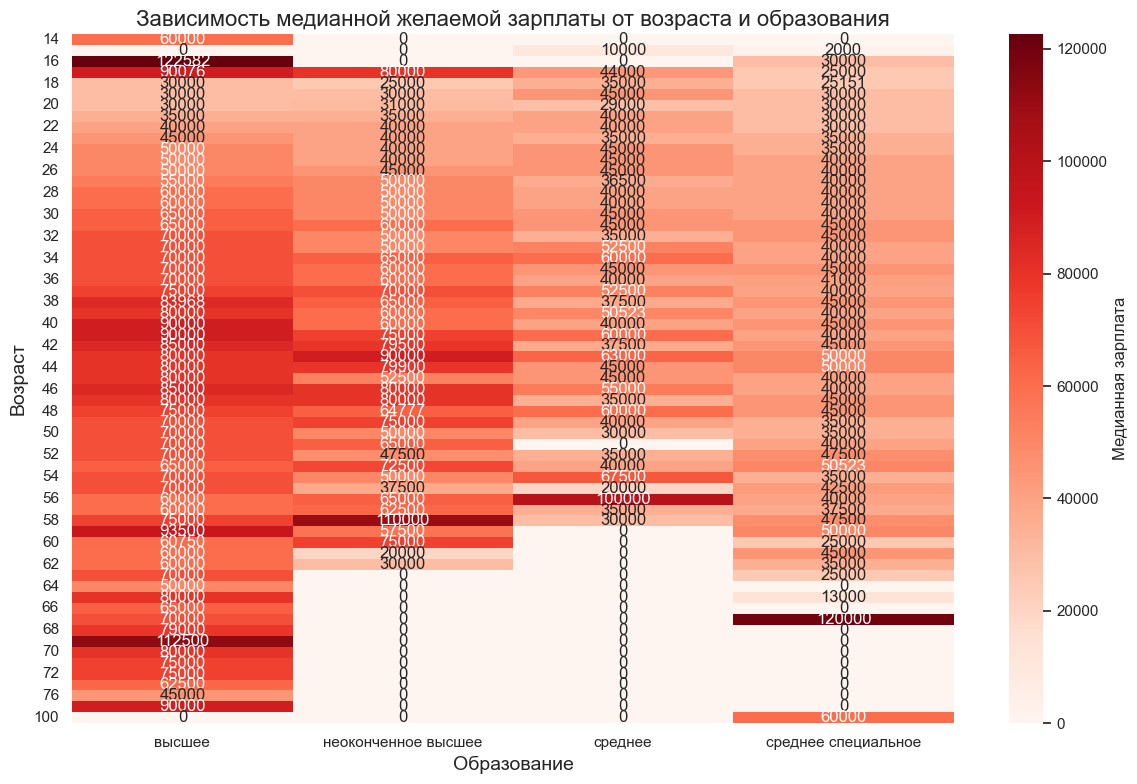

In [82]:
# Создание сводной таблицы: медианная "Желаемая зарплата" по "Возраст" и "Образование"
pivot_table = hh_cleaned.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median'
)

# Заполняем пропуски (если есть) в сводной таблице, например, значением 0 или NaN
pivot_table = pivot_table.fillna(0)

# Построение тепловой карты с использованием seaborn
plt.figure(figsize=(12, 8))  # Размер графика
sns.heatmap(
    pivot_table,
    annot=True,            # Подписываем значения в ячейках
    fmt=".0f",             # Форматирование значений (целые числа, т.е. зарплаты)
    cmap="Reds",         # Палитра цветов
    cbar_kws={'label': 'Медианная зарплата'}  # Подпись для цветовой шкалы
)

# Заголовки для тепловой карты
plt.title('Зависимость медианной желаемой зарплаты от возраста и образования', fontsize=16)
plt.xlabel('Образование', fontsize=14)
plt.ylabel('Возраст', fontsize=14)

# Отображение тепловой карты
plt.tight_layout()
plt.show()

Молодые соискатели (возрастная категория до 25 лет): у молодых соискателей наблюдаются сравнительно низкие показатели медианной желаемой зарплаты. Это объясняется начальным этапом карьеры, когда большинство кандидатов не обладают большим опытом. Однако в этой возрастной группе видна тенденция, что более высокий уровень образования (например, высшее или магистратура) связан с умеренно завышенными ожиданиями. Возрастная группа 26–35 лет: эта группа показывает наибольшую корреляцию между уровнем образования и желаемой зарплатой. То есть, люди с высшим образованием в данной возрастной категории ожидают значительно более высоких зарплат, чем люди со средним или незаконченным образованием. Здесь наблюдается явный рост медианной зарплаты, что можно связать с накоплением профессионального опыта и карьерным ростом. Люди среднего возраста (36–50 лет): Показатели доходов продолжают расти, достигая максимума или плато на возрастном пике карьеры. На тепловой карте видно, что здесь существуют наиболее высокие ожидания, особенно у людей с высшим или дополнительным профессиональным образованием (магистратура, аспирантура). Люди с начальным уровнем образования остаются с сильно заниженными ожиданиями, что подчеркивает влияние образовательного уровня на карьерный успех в данный период. Старший возраст (50+): После 50 лет могут наблюдаться признаки стагнации или снижения желаемой медианной зарплаты, особенно в группах с базовым образованием. Однако у людей с академическим и профессиональным образованием зарплатные ожидания остаются на относительно высоком уровне — это может говорить о том, что профессионалы-эксперты в своей области продолжают высоко ценить свою квалификацию. Также можно отметить, что данный тип диаграммы очень хорошо демонстрирует наличие аномальных значений для экстремальных возрастов в каждой образовательной группе.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

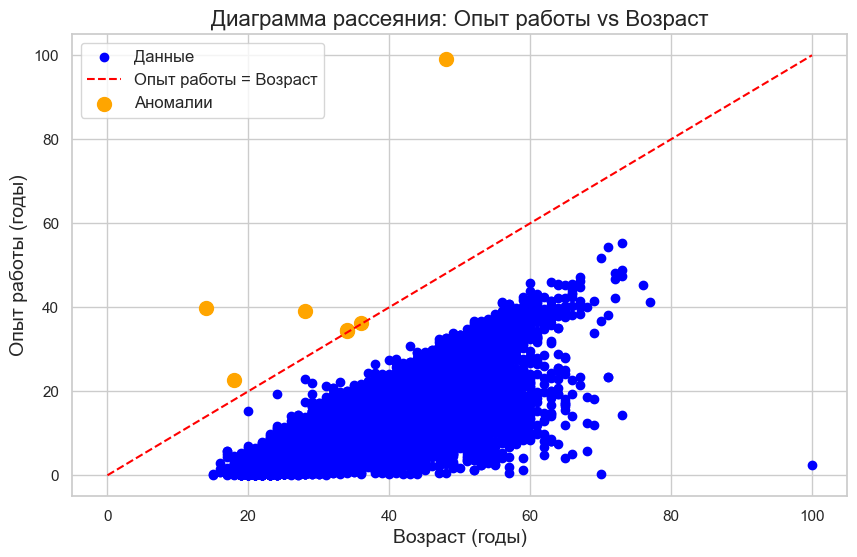

Аномалии в данных:
             Ищет работу на должность:  \
4535            Технический специалист   
19351  Специалист (Junior-программист)   
19872                         Аналитик   
26477             Менеджер IT-проектов   
29098      Ведущий инженер-программист   
40015  Системный администратор Windows   
43451   Руководитель отдела разработки   

                            Город, переезд, командировки  \
4535   Чебоксары , не готова к переезду , не готова к...   
19351  Краснодар , не готов к переезду , не готов к к...   
19872  Черкассы , не готов к переезду , не готов к ко...   
26477  Санкт-Петербург , готов к переезду (Египет, Но...   
29098  Москва , не готов к переезду , не готов к кома...   
40015  Ростов-на-Дону , готов к переезду , готов к ко...   
43451  Москва ,  м. Комсомольская , не готов к переез...   

                                             Опыт работы  \
4535   Опыт работы 22 года 7 месяцев  Январь 1996 — И...   
19351  Опыт работы 39 лет 2 месяца  Специал

In [83]:
# Преобразуем "Опыт работы (месяц)" в года
hh_cleaned["Опыт работы (годы)"] = hh_cleaned["Опыт работы (месяц)"] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния
plt.scatter(hh_cleaned["Возраст"], hh_cleaned["Опыт работы (годы)"], color="blue", label="Данные")

# Добавляем прямую (Опыт = Возраст)
x_line = np.linspace(0, 100, 100)  # От 0 до 100 лет
y_line = x_line  # y = x
plt.plot(x_line, y_line, color="red", linestyle="--", label="Опыт работы = Возраст")

# === Поиск и отображение аномалий ===
# Фильтруем точки: Опыт >= Возраст
anomalies = hh_cleaned[hh_cleaned["Опыт работы (годы)"] >= hh_cleaned["Возраст"]]

# Отображаем аномалии
plt.scatter(anomalies["Возраст"], anomalies["Опыт работы (годы)"], 
            color="orange", label="Аномалии", s=100)

# Настройка графика
plt.title("Диаграмма рассеяния: Опыт работы vs Возраст", fontsize=16)
plt.xlabel("Возраст (годы)", fontsize=14)
plt.ylabel("Опыт работы (годы)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

# Вывод найденных аномалий
if anomalies.empty:
    print("Аномалии не найдены.")
else:
    print("Аномалии в данных:")
    print(anomalies)


Этот подход аналитически обоснован и применим для предварительного выявления ошибок и несоответствий в данных.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


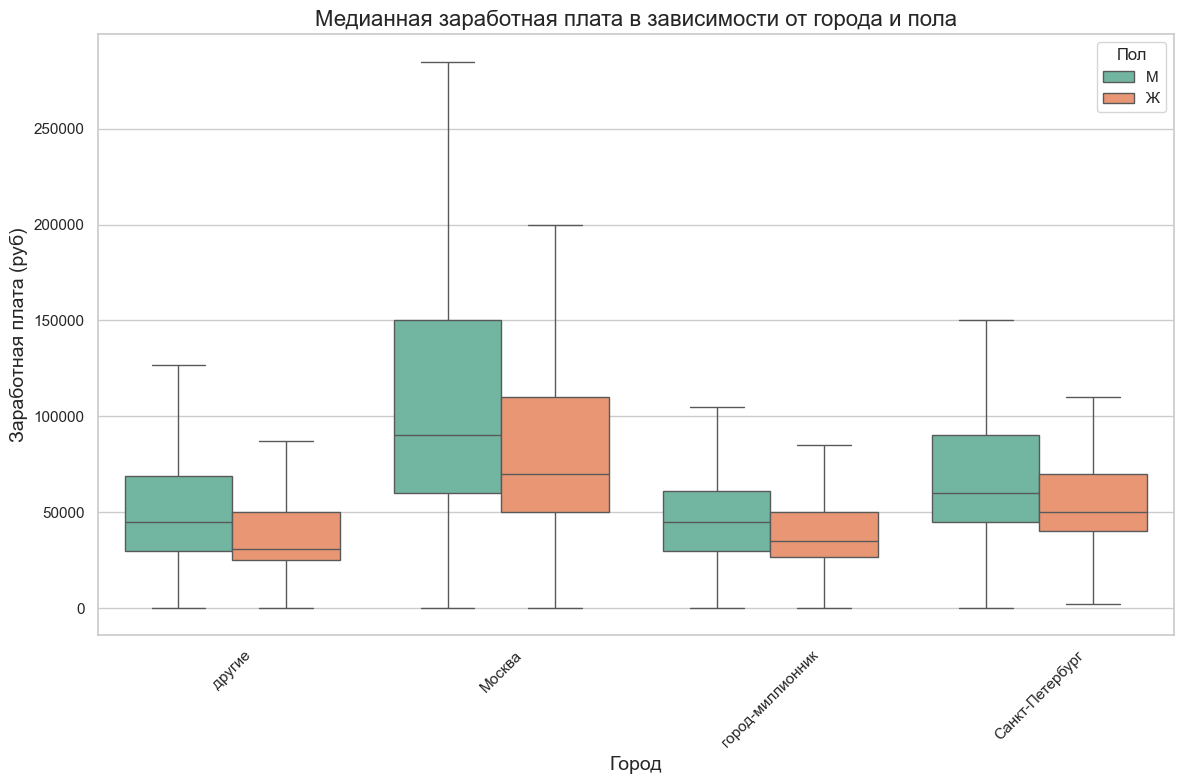

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных: очистка от пропущенных значений по зарплате, полу, городу
filtered_data = hh_cleaned.dropna(subset=['ЗП (руб)', 'Пол', 'Город'])

# Создаем фигуру
plt.figure(figsize=(12, 8))

# Используем Seaborn для построения коробчатой диаграммы
sns.boxplot(
    x='Город',                  # Города - ось X
    y='ЗП (руб)',               # Зарплата - ось Y
    hue='Пол',                  # Разбиение по полу
    data=filtered_data,         # Отфильтрованные данные
    palette='Set2',             # Цветовая схема
    showfliers=False            # Скрыть выбросы для читаемости
)

# Настройка заголовка и подписей
plt.title('Медианная заработная плата в зависимости от города и пола', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Заработная плата (руб)', fontsize=14)
plt.legend(title='Пол', loc='upper right')
plt.xticks(rotation=45)  # Поворот подписей городов для читаемости

# Показываем график
plt.tight_layout()
plt.show()

C:\Users\vani003\AppData\Local\Temp\ipykernel_14004\2911554528.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  z_min = hh_cleaned.groupby(["Пол", "Возрастная группа", "Образование"])["ЗП (руб)"].median().min()
C:\Users\vani003\AppData\Local\Temp\ipykernel_14004\2911554528.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  z_max = hh_cleaned.groupby(["Пол", "Возрастная группа", "Образование"])["ЗП (руб)"].median().max()
C:\Users\vani003\AppData\Local\Temp\ipykernel_14004\2911554528.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future versio

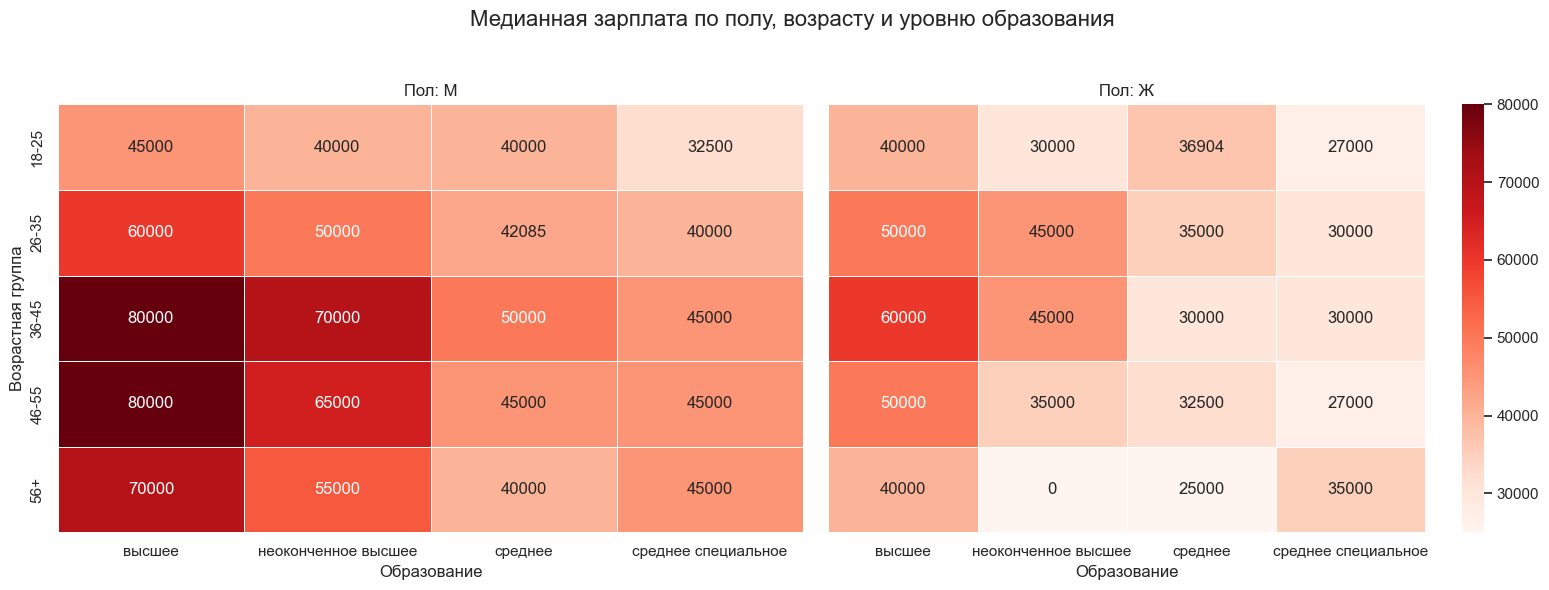

In [85]:
# Определяем возрастные группы
bins = [18, 25, 35, 45, 55, np.inf]  # Границы возрастных интервалов
labels = ["18-25", "26-35", "36-45", "46-55", "56+"]  # Соответствующие названия групп

# Добавляем столбец с возрастной группой
hh_cleaned["Возрастная группа"] = pd.cut(hh_cleaned["Возраст"], bins=bins, labels=labels, right=False)

# Уникальные значения пола для построения графиков
genders = hh_cleaned["Пол"].unique()

# Создаем фигуру для подграфиков
fig, axes = plt.subplots(1, len(genders), figsize=(16, 6), sharey=True)  # Два подграфика на одной строке
sns.set(style="whitegrid")

# Общий диапазон Z-значений для единой цветовой шкалы (минимальная и максимальная медианные ЗП)
z_min = hh_cleaned.groupby(["Пол", "Возрастная группа", "Образование"])["ЗП (руб)"].median().min()
z_max = hh_cleaned.groupby(["Пол", "Возрастная группа", "Образование"])["ЗП (руб)"].median().max()

for i, gender in enumerate(genders):
    # Фильтруем данные по полу
    gender_data = hh_cleaned[hh_cleaned["Пол"] == gender]
    
    # Сводная таблица: медианная ЗП по возрастным группам и уровню образования
    pivot_table = gender_data.pivot_table(
        values="ЗП (руб)",
        index="Возрастная группа",
        columns="Образование",
        aggfunc="median"
    ).fillna(0)  # Замена NaN на 0 для аккуратной визуализации
    
    # Создание тепловой карты
    sns.heatmap(
        pivot_table,
        ax=axes[i],
        annot=True,  # Подписи значений на графике
        fmt=".0f",   # Формат чисел (целые числа, без дробей)
        cmap="Reds",  # Цветовая схема
        cbar=i == len(genders) - 1,  # Общая цветовая шкала (только для последнего подграфика)
        vmin=z_min,  # Минимум цвета для всей диаграммы
        vmax=z_max,  # Максимум цвета для всей диаграммы
        linewidths=0.5
    )
    
    # Настройка заголовков и подписи осей
    axes[i].set_title(f"Пол: {gender}")
    axes[i].set_xlabel("Образование")
    axes[i].set_ylabel("Возрастная группа" if i == 0 else "")  # Ось Y только на первом графике

# Общий заголовок для всего графика
plt.suptitle("Медианная зарплата по полу, возрасту и уровню образования", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Увеличиваем расстояние для общего заголовка
plt.show()

Мужчины с высшим образованием в возрасте 36–45 лет имеют максимальные заработные ожидания.Средний доход у мужчин выше, чем у женщин, практически во всех возрастных группах и для всех уровней образования. Высшее образование для женщин, снижает уровень дифернециции заработной платы, напротив для людей с «Средним» образованием анализ демонстрирует более существенную разницу в заработке по полу, особенно в старших группах (46–55 или 56+). Это может быть связано с влиянием разницы в карьерных возможностях.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [86]:
# Найдём полные дубликаты
duplicates = hh_cleaned.duplicated()

# Посмотрим, сколько строк имеют дубликаты
print(f"Количество полных дубликатов: {duplicates.sum()}")

# Удаляем дубликаты и сохраняем в новый DataFrame
hh_cleaned = hh_cleaned.drop_duplicates()

# Проверим, что дубликаты удалены
print(f"Размер таблицы после удаления дубликатов: {hh_cleaned.shape}")

Количество полных дубликатов: 155
Размер таблицы после удаления дубликатов: (44589, 27)


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [87]:
# Вывод информации о числе пропусков в каждом столбце
missing_info = hh_cleaned.isnull().sum()
print("Число пропусков в каждом столбце:")
print(missing_info)

# Проверка числа пропусков в колонке «Опыт работы (месяц)»
missing_experience = missing_info.get("Опыт работы (месяц)", 0)
print(f"\nКоличество пропусков в столбце 'Опыт работы (месяц)': {missing_experience}")

Число пропусков в каждом столбце:
Ищет работу на должность:            0
Город, переезд, командировки         0
Опыт работы                        166
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                      

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [88]:
# Удаление строк с пропусками в столбцах 
# «Последнее/нынешнее место работы» и «Последняя/нынешняя должность»
hh_cleaned = hh_cleaned.dropna(subset=["Последнее/нынешнее место работы", "Последняя/нынешняя должность"])

# Замена пропусков в столбце «Опыт работы (месяц)» медианным значением
median_experience = hh_cleaned["Опыт работы (месяц)"].median()
hh_cleaned["Опыт работы (месяц)"] = hh_cleaned["Опыт работы (месяц)"].fillna(median_experience)

# Рассчитываем новое среднее значение
new_mean_experience = hh_cleaned["Опыт работы (месяц)"].mean()

# Округляем результат до целых
new_mean_experience_rounded = round(new_mean_experience)

# Вывод результата
print("Результирующее среднее значение:", new_mean_experience_rounded)

Результирующее среднее значение: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [89]:
# Удаление выбросов в столбце "Заработная плата"
hh_filtered = hh_cleaned[(hh_cleaned["ЗП (руб)"] >= 1000) & (hh_cleaned["ЗП (руб)"] <= 1000000)]

# Проверка размера набора данных после очистки
print("Размер набора данных после удаления выбросов:", hh_filtered.shape)

# Общее количество строк в исходном наборе данных
total_rows = hh_cleaned.shape[0]

# Количество строк после удаления выбросов
filtered_rows = hh_filtered.shape[0]

# Количество выбросов
outliers_count = total_rows - filtered_rows

print("Количество выбросов, найденных и удалённых:", outliers_count)

Размер набора данных после удаления выбросов: (44498, 27)
Количество выбросов, найденных и удалённых: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [90]:
# Преобразуем "Опыт работы (месяц)" в года
hh_filtered["Опыт работы (годы)"] = hh_filtered["Опыт работы (месяц)"] / 12

# Фильтрация резюме, где опыт работы превышает возраст
filtered_resumes = hh_filtered[hh_filtered["Опыт работы (годы)"] <= hh_filtered["Возраст"]]

original_size = hh_filtered.shape[0]  # Размер исходного набора данных

# После фильтрации вы получили следующий размер
filtered_size = filtered_resumes.shape[0]

# Подсчет выбросов
number_of_outliers = original_size - filtered_size
print("Количество выбросов, исключённых из набора данных:", number_of_outliers)

Количество выбросов, исключённых из набора данных: 7


C:\Users\vani003\AppData\Local\Temp\ipykernel_14004\180217756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_filtered["Опыт работы (годы)"] = hh_filtered["Опыт работы (месяц)"] / 12


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Найдены выбросы в столбце 'Возраст':
            Ищет работу на должность:  \
29098     Ведущий инженер-программист   
31137  Менеджер по работе с клиентами   
32950                 Тестировщик игр   
33654            Frontend-разработчик   

                            Город, переезд, командировки  \
29098  Москва , не готов к переезду , не готов к кома...   
31137  Санкт-Петербург , не готов к переезду , не гот...   
32950  Канск , не готов к переезду , не готов к коман...   
33654  Санкт-Петербург , не готов к переезду , готов ...   

                                             Опыт работы  \
29098  Опыт работы 39 лет 9 месяцев  Ведущий инженер-...   
31137  Опыт работы 2 месяца  Июнь 2018 — Июль  2018 2...   
32950  Опыт работы 3 месяца  Март 2019 — по настоящее...   
33654  Опыт работы 2 года 6 месяцев  Февраль 2019 — п...   

      Последнее/нынешнее место работы    Последняя/нынешняя должность  \
29098        КБ Аметист, Концерн АГАТ     Ведущий инженер-программист   
31137    

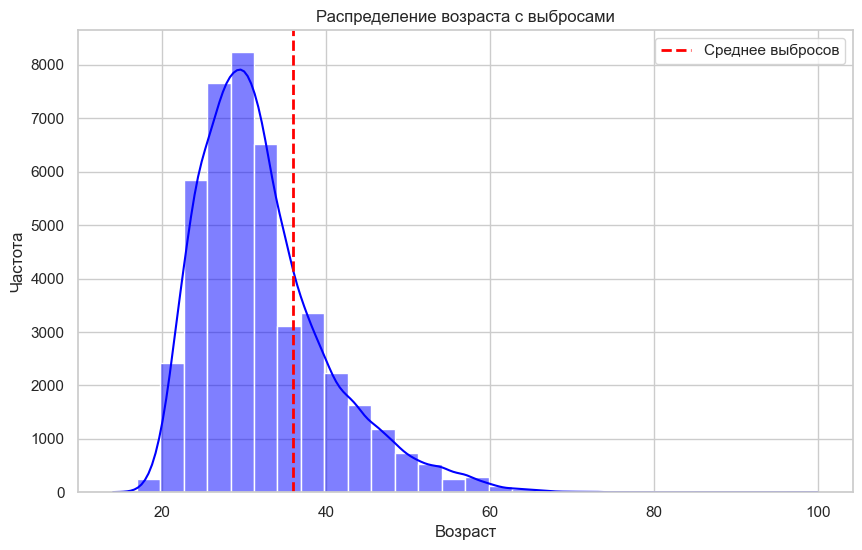

In [91]:
# Проверка на нулевые значения
if 'Возраст' not in hh_filtered.columns:
    raise ValueError("DataFrame должен содержать колонку 'Возраст'.")

def outliers_z_score_mod(data, column_name, threshold=3, log_transform=False):
    if column_name not in data.columns:
        raise ValueError(f"Столбец {column_name} не найден в DataFrame.")
    
    # Применяем логарифмическое преобразование, если указано
    if log_transform:
        # Проверяем, что все значения положительные
        if (data[column_name] <= 0).any():
            raise ValueError("Логарифмическое преобразование невозможно: в данных содержатся ненормативные значения.")
        transformed_data = np.log(data[column_name] + 1)
    else:
        transformed_data = data[column_name]
    
    # Вычисляем Z-оценки
    z_scores = (transformed_data - transformed_data.mean()) / transformed_data.std()
    
    # Сдвигаем границу на 1 сигму вправо
    adjusted_threshold_upper = threshold + 1  # Сдвигаем границу вправо на одну стандартную девиацию

    # Находим выбросы
    outliers = data[(z_scores > adjusted_threshold_upper) | (z_scores < -threshold)]
    
    return outliers

# Применение функции для нахождения выбросов в столбце 'Возраст'
outliers = outliers_z_score_mod(hh_filtered, 'Возраст', threshold=3, log_transform=True)

# Выводим найденные выбросы
print("Найдены выбросы в столбце 'Возраст':")
print(outliers)

# Визуализация
plt.figure(figsize=(10, 6))
sns.histplot(hh_filtered['Возраст'], bins=30, kde=True, color='blue')
plt.axvline(outliers['Возраст'].mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее выбросов')
plt.title('Распределение возраста с выбросами')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()
plt.show()

Из графика видно, что возраст пользователей в основном сгруппирован в определенном диапазоне, это люди в возрасте от 20 до 40 лет составляют большую часть выборки, это может указывать на то, что ваша аудитория преимущественно моложе. График имеет два отчетливых пика (бимодальное распределение), это может указывать на существование двух разных групп пользователей. Наличие асимметричности: график имеет длинный "хвост" в одном из направлений (вправо), это может означать, что среди пользователей есть значимая группа людей старшего возраста. После послабления в право на  1 сигму программа зафиксировала 4 выброса (контрольное значение при этом 3) : 14, 15 и 100 лет. 